In [1]:
import MDAnalysis
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
import seaborn as sns
import itertools
import warnings
from time import time
from scipy import stats

warnings.filterwarnings('ignore')

/home/utilizzatore/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/chemfiles.py:82: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.version import LooseVersion
/home/utilizzatore/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


In [2]:
results_pp11 = np.load('results_pp11.npy', allow_pickle=True)
results_pp11_df = pd.DataFrame.from_records(results_pp11).set_index('cutoff')

results_pp11_df['E_avg'] = results_pp11_df[['Ex', 'Ed', 'Ed2']].mean(axis=1)

In [3]:
pp11_df_regimes = pd.DataFrame({'E': [0.732, 0.876, 0.993, 0.867, 0.83], 
                                'Regime': ['Static', 'Dynamic', 'Dynamic+', 'Average', 'MD']})

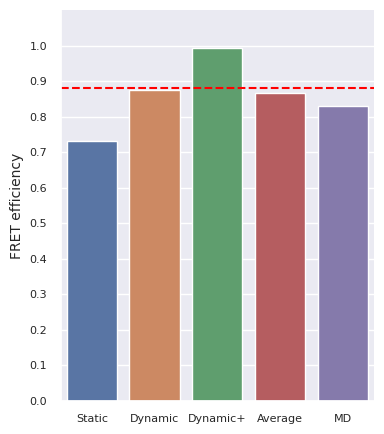

In [4]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(3.5, 2.5)})

palette = sns.color_palette("mako_r")

g = sns.catplot(data=pp11_df_regimes,
                x='Regime', y='E',
                kind="bar", legend=True)

plt.axhline(0.88, color='red', linestyle = '--')

g.fig.set_size_inches(4.0, 4.5)

ax = g.axes

ax[0, 0].set_ylim(0, 1.1)
ax[0, 0].set_yticks(np.arange(0,1.1, 0.1))
        
for label in (ax[0, 0].get_xticklabels() + ax[0, 0].get_yticklabels()):
    label.set_fontsize(8)

ax[0, 0].set_xlabel('', fontsize=10)
ax[0, 0].set_ylabel('FRET efficiency', fontsize=10)

plt.tight_layout()

plt.show()

# g.savefig('Fig3.eps')
# g.savefig('Fig3.png', dpi=320)